# 05. Error Estimator Differences
In this notebook we analyse the error of the MSE estimator. We load the data from the json-files for RF and XGB respectively. After combining the data we plot different boxplots and calculate the difference of the means between stratified vs. unstratifed.

## Load json data for RF and XGB

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import os
from utils_boxplots import flatten_data, plot_eval
import numpy as np
import seaborn as sns
from tabulate import tabulate

# remove waringns
import warnings
warnings.filterwarnings("ignore")


#### First: Random Forest
# set file path to json files (change model) -> get names of json files
json_path = "./slds_stratification/results/rf/"
json_files = os.listdir(json_path)


# load data from json file
data = []
for file in json_files:
    with open(json_path + file) as f:
        data_new = json.load(f)
        data = data + data_new

# flatten dictionary and convert to dataframe
data_all_flatten, keys_dic = flatten_data(data)
df_rf = pd.DataFrame(data_all_flatten)
print('Shape of data', df_rf.shape)
print('Colum names of data', df_rf.columns)
print('Number of Colums', df_rf.columns.shape)
print('Keys of dictionary (', len(keys_dic), ')', keys_dic)


# check for duplicates ind data
print('Duplicates: ', df_rf.astype(str).duplicated().sum())


df_rf.head()

Shape of data (4800, 75)
Colum names of data Index(['model_info_model', 'model_info_n_train', 'model_info_n_test',
       'model_info_n_features', 'model_info_noise',
       'model_info_transformation', 'model_info_group_size',
       'model_info_n_folds', 'model_info_n_iter', 'model_info_n_repetitions',
       'model_info_scoring', 'model_info_n_jobs', 'model_info_json_file',
       'repetition', 'random_state', 'hyperparameters_same',
       'unstratified_results_train r2', 'unstratified_results_test r2',
       'unstratified_results_train mse', 'unstratified_results_test mse',
       'unstratified_results_train mae', 'unstratified_results_test mae',
       'stratified_results_train r2', 'stratified_results_test r2',
       'stratified_results_train mse', 'stratified_results_test mse',
       'stratified_results_train mae', 'stratified_results_test mae',
       'cv_unstratified_iterations_mean_fit_time',
       'cv_unstratified_iterations_std_fit_time',
       'cv_unstratified_iterat

,model_info_model,model_info_n_train,model_info_n_test,model_info_n_features,model_info_noise,model_info_transformation,model_info_group_size,model_info_n_folds,model_info_n_iter,model_info_n_repetitions,...,cv_folds_descriptives_unstratified_intersection_area,cv_folds_descriptives_stratified_ks_statistic,cv_folds_descriptives_stratified_p_value,cv_folds_descriptives_stratified_intersection_area,unstratified_best_params_min_samples_split,unstratified_best_params_min_samples_leaf,unstratified_best_params_max_features,stratified_best_params_min_samples_split,stratified_best_params_min_samples_leaf,stratified_best_params_max_features
0,rf,200,100000,8,0,identity,5,5,200,30,...,0.877017,0.025,1.0,0.957862,2,1,8,2,1,6
1,rf,200,100000,8,0,identity,5,5,200,30,...,0.874369,0.025,1.0,0.947189,4,1,7,5,1,6
2,rf,200,100000,8,0,identity,5,5,200,30,...,0.897163,0.025,1.0,0.959497,2,1,7,2,1,7
3,rf,200,100000,8,0,identity,5,5,200,30,...,0.886524,0.025,1.0,0.955489,2,1,6,2,1,5
4,rf,200,100000,8,0,identity,5,5,200,30,...,0.881115,0.025,1.0,0.964351,2,1,7,4,1,5


In [2]:
#### Second: XGBoost
# set file path to json files (change model) -> get names of json files
json_path = './slds_stratification/results/xgb/'
json_files = os.listdir(json_path)


# load data from json file
data = []
for file in json_files:
    with open(json_path + file) as f:
        data_new = json.load(f)
        data = data + data_new

# flatten dictionary and convert to dataframe
data_all_flatten, keys_dic = flatten_data(data)
df_xgb = pd.DataFrame(data_all_flatten)
print('Shape of data', df_xgb.shape)
print('Colum names of data', df_xgb.columns)
print('Number of Colums', df_xgb.columns.shape)
print('Keys of dictionary (', len(keys_dic), ')', keys_dic)


# check for duplicates ind data
print('Duplicates: ', df_xgb.astype(str).duplicated().sum())


df_xgb.head()

Shape of data (4800, 87)
Colum names of data Index(['model_info_model', 'model_info_n_train', 'model_info_n_test',
       'model_info_n_features', 'model_info_noise',
       'model_info_transformation', 'model_info_group_size',
       'model_info_n_folds', 'model_info_n_iter', 'model_info_n_repetitions',
       'model_info_scoring', 'model_info_n_jobs', 'model_info_json_file',
       'repetition', 'random_state', 'hyperparameters_same',
       'unstratified_results_train r2', 'unstratified_results_test r2',
       'unstratified_results_train mse', 'unstratified_results_test mse',
       'unstratified_results_train mae', 'unstratified_results_test mae',
       'stratified_results_train r2', 'stratified_results_test r2',
       'stratified_results_train mse', 'stratified_results_test mse',
       'stratified_results_train mae', 'stratified_results_test mae',
       'cv_unstratified_iterations_mean_fit_time',
       'cv_unstratified_iterations_std_fit_time',
       'cv_unstratified_iterat

,model_info_model,model_info_n_train,model_info_n_test,model_info_n_features,model_info_noise,model_info_transformation,model_info_group_size,model_info_n_folds,model_info_n_iter,model_info_n_repetitions,...,unstratified_best_params_max_depth,unstratified_best_params_learning_rate,unstratified_best_params_gamma,unstratified_best_params_colsample_bytree,stratified_best_params_subsample,stratified_best_params_min_child_weight,stratified_best_params_max_depth,stratified_best_params_learning_rate,stratified_best_params_gamma,stratified_best_params_colsample_bytree
0,xgb,200,100000,8,0,identity,5,5,200,20,...,2,0.222667,1.000000,0.687279,0.847472,2,2,0.311333,1.000000,0.982669
1,xgb,200,100000,8,0,identity,5,5,200,20,...,2,0.267000,3.786479,0.982669,0.729761,6,2,0.222667,3.786479,0.982669
2,xgb,200,100000,8,0,identity,5,5,200,20,...,2,0.267000,1.945888,0.548831,0.997877,2,2,0.222667,1.000000,0.585893
3,xgb,200,100000,8,0,identity,5,5,200,20,...,2,0.222667,1.945888,0.982669,0.997877,4,2,0.134000,1.000000,0.517950
4,xgb,200,100000,8,0,identity,5,5,200,20,...,17,0.178333,1.394951,0.976185,0.697330,6,3,0.222667,1.394951,0.548831


In [3]:
# combine rf and xgb data
data = pd.concat([df_rf, df_xgb], axis=0, ignore_index=True)
original_shape = data.shape[0]

In [4]:
# capitizle model name for plots
data['model_info_model'] = data['model_info_model'].str.upper()

In [5]:
# opitonal: exclude all rows if hyperparmeters are the same
exclude_hyp_dame = False
if exclude_hyp_dame:
    data = data[data['hyperparameters_same'] == False]
    data = data.reset_index(drop=True) #reset index of data
    print('Original shape: ', original_shape)
    print('Shape after removing hyperparameters that are the same: ', data.shape[0])
    print('Percetage', data.shape[0]/original_shape)
    data.head()
 

In [6]:
# creat unique identifier for plots
model_vars = ['model_info_n_train',	'model_info_noise',	'model_info_group_size']
model_vars_title =  [s.rsplit('_', 1)[-1] for s in model_vars]

data['param_model'] = data.loc[:, model_vars].astype(str).agg('_'.join, axis=1)
print('Shape of data', data.shape)
data['param_model'].head()

Shape of data (9600, 100)


0    200_0_5
1    200_0_5
2    200_0_5
3    200_0_5
4    200_0_5
Name: param_model, dtype: object

## Analysis Estimation Error
Add colum with calculated error_estimator_stratified and their mean over the Random Search Iteratons:


In [7]:
data['error_estimator_stratified'] = data['param_model'] 
data['error_estimator_unstratified'] = data['param_model'] 

for i in range(len(data)):
    # Note: cv_stratified_iterations_mean_test_score is negagtive MSE, wherase cv_iteration_refit_test_mse is absolute MSE -> add two values
    # error estimate: stratified
    data['error_estimator_stratified'][i] =  [(x + y)**2 for x, y in zip(data['cv_stratified_iterations_mean_test_score'][i], data['cv_iteration_refit_test_mse'][i])]
    # error estimate: unstratified
    data['error_estimator_unstratified'][i]   = [(x + y)**2 for x, y in zip(data['cv_unstratified_iterations_mean_test_score'][i], data['cv_iteration_refit_test_mse'][i])]

print(len(data['error_estimator_stratified'][0]))
print(len(data['error_estimator_stratified']))

200
9600


In [8]:
# Calculate the difference
data['difference'] = data.apply(
    lambda row: [a - b for a, b in zip(row['error_estimator_stratified'], row['error_estimator_unstratified'])],
    axis=1
)

print(data['difference'][0])
data.head()

[-1.0756716491236233, -2.1387512707104577, -1.0065114518632985, -0.9901313261856075, -2.1387512707104577, -0.7585389919139012, -0.5082805016035296, -0.8592371984395272, -0.6223893494403573, -0.5350804861322602, -1.91532256808367, -0.6386824543529435, -0.2623971277816593, -0.7612627059710524, -1.1154489384022976, -1.9013319145800018, -1.9889783459374462, -1.0065114518632985, -0.8295536509142409, -0.9037829114628027, -0.7108549036531129, -1.8502595063445724, -0.3164106569810926, -1.2891205436741193, -0.7748568705066312, -0.9110106135967875, -0.7692549301733083, -0.674999788718952, -0.6921677481065815, -0.2384385443203735, -0.5121478444725998, -0.5936934173786639, -1.1786199251844873, -1.9889783459374462, -0.6601179907615924, -0.7424180061795309, -0.4236591299565946, -2.8060428918468587, -0.10556160756075669, -0.3064618553562871, -0.6788481092157257, -1.1786199251844873, -0.6520713705760368, -1.8502595063445724, -0.6179878791194537, -0.7843929581645208, -0.696835978231207, -0.535080486132

,model_info_model,model_info_n_train,model_info_n_test,model_info_n_features,model_info_noise,model_info_transformation,model_info_group_size,model_info_n_folds,model_info_n_iter,model_info_n_repetitions,...,stratified_best_params_subsample,stratified_best_params_min_child_weight,stratified_best_params_max_depth,stratified_best_params_learning_rate,stratified_best_params_gamma,stratified_best_params_colsample_bytree,param_model,error_estimator_stratified,error_estimator_unstratified,difference
0,RF,200,100000,8,0,identity,5,5,200,30,...,NaN,NaN,NaN,NaN,NaN,NaN,200_0_5,"[1.4218212607175496, 2.3526758888787738, 1.577...","[2.497492909841173, 4.491427159589231, 2.58422...","[-1.0756716491236233, -2.1387512707104577, -1...."
1,RF,200,100000,8,0,identity,5,5,200,30,...,NaN,NaN,NaN,NaN,NaN,NaN,200_0_5,"[1.094016121401267, 0.928789390221955, 0.55464...","[1.0792183574702465, 0.9223640656869064, 1.041...","[0.014797763931020391, 0.0064253245350485155, ..."
2,RF,200,100000,8,0,identity,5,5,200,30,...,NaN,NaN,NaN,NaN,NaN,NaN,200_0_5,"[1.0014524538184724, 1.1994575363721403, 1.061...","[2.112424106929354, 3.065694773401047, 3.96259...","[-1.1109716531108818, -1.8662372370289066, -2...."
3,RF,200,100000,8,0,identity,5,5,200,30,...,NaN,NaN,NaN,NaN,NaN,NaN,200_0_5,"[0.21266704003121076, 0.7885639288270032, 0.05...","[0.5082517302783752, 1.4373893014563646, 0.160...","[-0.2955846902471645, -0.6488253726293614, -0...."
4,RF,200,100000,8,0,identity,5,5,200,30,...,NaN,NaN,NaN,NaN,NaN,NaN,200_0_5,"[0.47544843654552876, 0.004129605063708734, 0....","[0.32659767877263224, 0.009192310133934267, 0....","[0.14885075777289652, -0.005062705070225533, -..."


In [9]:
# create per row entry of differences
data_exploded = data.explode('difference')

# check dimensions
print(len(data_exploded))
print(len(data) * 200)

data_exploded.head()

1920000
1920000


,model_info_model,model_info_n_train,model_info_n_test,model_info_n_features,model_info_noise,model_info_transformation,model_info_group_size,model_info_n_folds,model_info_n_iter,model_info_n_repetitions,...,stratified_best_params_subsample,stratified_best_params_min_child_weight,stratified_best_params_max_depth,stratified_best_params_learning_rate,stratified_best_params_gamma,stratified_best_params_colsample_bytree,param_model,error_estimator_stratified,error_estimator_unstratified,difference
0,RF,200,100000,8,0,identity,5,5,200,30,...,NaN,NaN,NaN,NaN,NaN,NaN,200_0_5,"[1.4218212607175496, 2.3526758888787738, 1.577...","[2.497492909841173, 4.491427159589231, 2.58422...",-1.075672
0,RF,200,100000,8,0,identity,5,5,200,30,...,NaN,NaN,NaN,NaN,NaN,NaN,200_0_5,"[1.4218212607175496, 2.3526758888787738, 1.577...","[2.497492909841173, 4.491427159589231, 2.58422...",-2.138751
0,RF,200,100000,8,0,identity,5,5,200,30,...,NaN,NaN,NaN,NaN,NaN,NaN,200_0_5,"[1.4218212607175496, 2.3526758888787738, 1.577...","[2.497492909841173, 4.491427159589231, 2.58422...",-1.006511
0,RF,200,100000,8,0,identity,5,5,200,30,...,NaN,NaN,NaN,NaN,NaN,NaN,200_0_5,"[1.4218212607175496, 2.3526758888787738, 1.577...","[2.497492909841173, 4.491427159589231, 2.58422...",-0.990131
0,RF,200,100000,8,0,identity,5,5,200,30,...,NaN,NaN,NaN,NaN,NaN,NaN,200_0_5,"[1.4218212607175496, 2.3526758888787738, 1.577...","[2.497492909841173, 4.491427159589231, 2.58422...",-2.138751


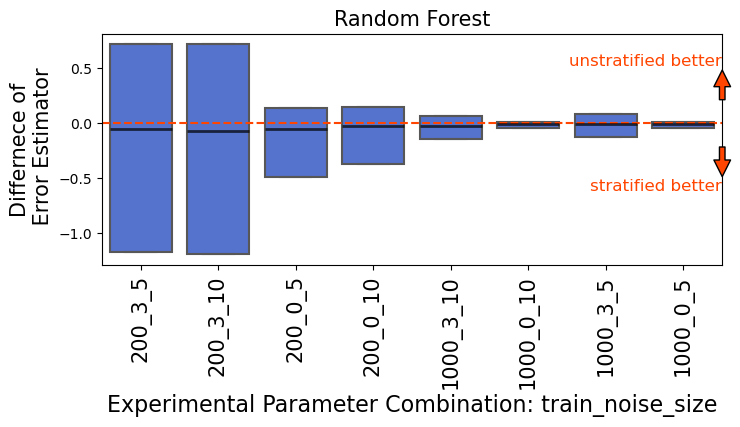

In [10]:
# filter data_exploded by model_info_model = 'RF' and model_info_transformation identity
data_exploded_filtered = data_exploded[(data_exploded['model_info_model'] == 'RF') & (data_exploded['model_info_transformation'] == 'identity')] 

# select columns param_model, difference
data_exploded_filtered = data_exploded_filtered[['param_model', 'difference']]

# order by median
medians = data_exploded_filtered.groupby('param_model')['difference'].mean() # ordered by mean
sorted_categories = medians.sort_values().index

# drop index of data_exploded_filtered
data_exploded_filtered = data_exploded_filtered.reset_index(drop=True)

# boxplot
plt.figure(figsize=(8, 3))
sns.boxplot(x='param_model', y='difference', data=data_exploded_filtered,  showfliers=False, 
            order=sorted_categories, color='royalblue', medianprops=dict(color="black", alpha=0.7, linewidth=2), whis=0) 
plt.xticks(rotation=90, fontsize=15)
 
#Line
plt.axhline(y=0, color='orangered', linestyle='--')

# Adding annotations
plt.text(x=len(sorted_categories) - 0.5, y= 0.5 , s='unstratified better', ha='right', va='bottom', color='orangered', fontsize=12)
plt.text(x=len(sorted_categories) - 0.5, y= - 0.5, s='stratified better', ha='right', va='top', color='orangered', fontsize=12)

# Adding arrows
arrow_length = 0.2 # Adjust this value for the desired arrow length
plt.annotate('', xy=(len(sorted_categories) - 0.5, 0.5), xytext=(len(sorted_categories) - 0.5, arrow_length),
            arrowprops=dict(facecolor='orangered', shrink=0.05))
plt.annotate('', xy=(len(sorted_categories) - 0.5, - 0.5), xytext=(len(sorted_categories) - 0.5, -arrow_length),
            arrowprops=dict(facecolor='orangered', shrink=0.05))

plt.ylabel('Differnece of\n Error Estimator', fontsize=15)
plt.title('Random Forest', fontsize=15)
plt.xlabel('Experimental Parameter Combination: '+  '_'.join(model_vars_title),  fontsize=16)
plt.show()




identity
RF
param_model
200_3_5     -0.575676
200_3_10    -0.484584
200_0_5     -0.239998
200_0_10     -0.13658
1000_3_10   -0.044658
1000_0_10   -0.017973
1000_3_5     -0.01616
1000_0_5    -0.015995
Name: difference, dtype: object


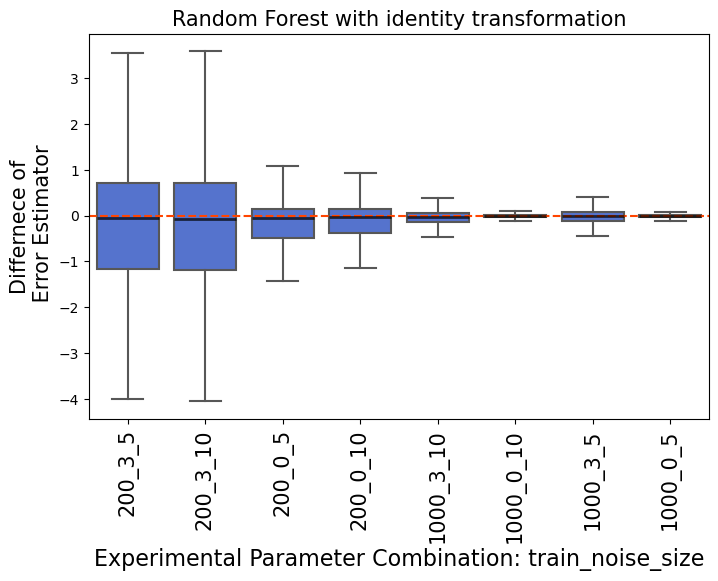

sqrt
RF
param_model
200_0_5     -0.000123
200_0_10    -0.000073
200_3_10     -0.00004
200_3_5     -0.000037
1000_3_10   -0.000007
1000_0_10   -0.000007
1000_0_5    -0.000007
1000_3_5    -0.000005
Name: difference, dtype: object


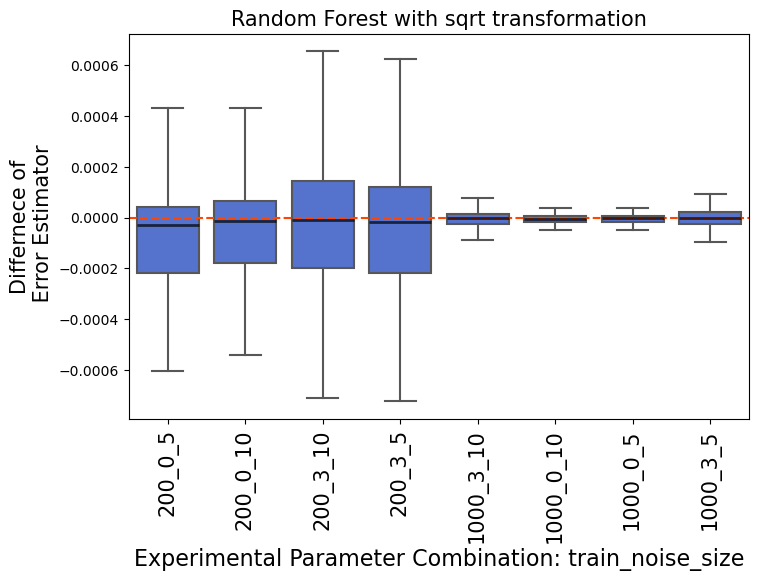

log
RF
param_model
200_0_10    -0.000023
200_0_5     -0.000014
200_3_5     -0.000003
1000_0_5    -0.000002
1000_0_10   -0.000002
1000_3_10   -0.000001
200_3_10    -0.000001
1000_3_5    -0.000001
Name: difference, dtype: object


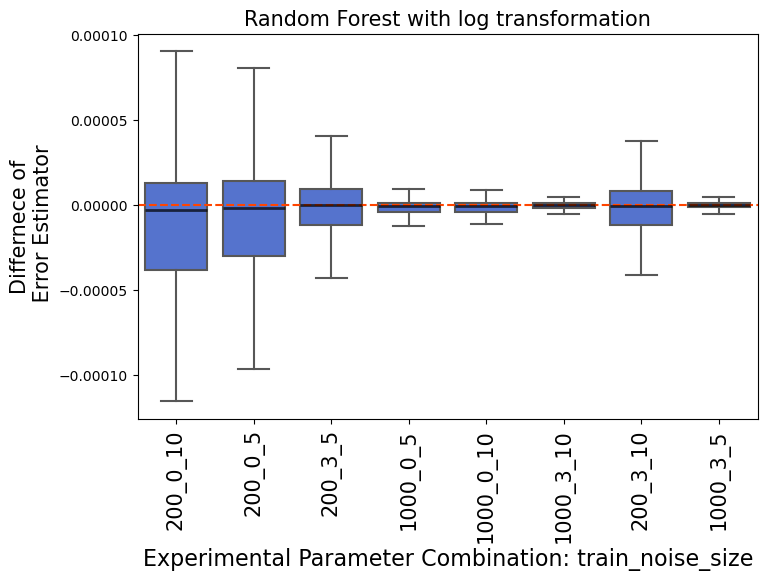

identity
XGB
param_model
200_3_5     -0.396987
200_3_10    -0.092387
200_0_10    -0.067783
200_0_5      -0.06681
1000_3_10   -0.013739
1000_3_5    -0.007437
1000_0_5    -0.006062
1000_0_10   -0.005509
Name: difference, dtype: object


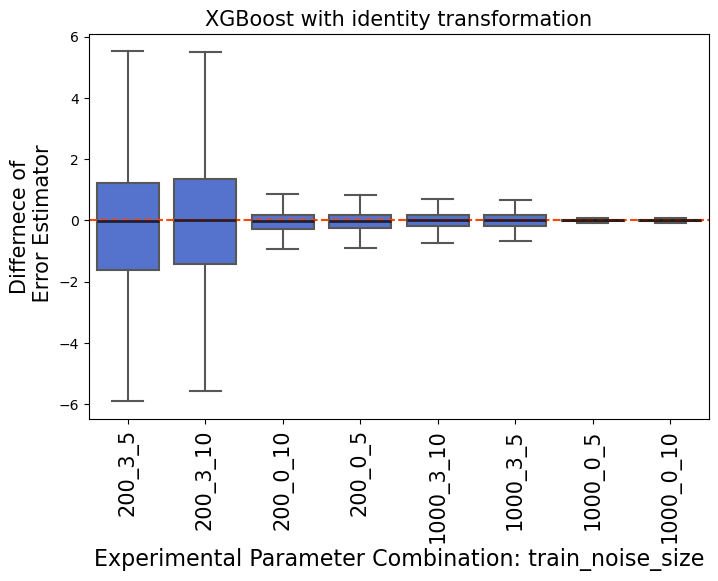

sqrt
XGB
param_model
200_0_10    -0.000241
200_0_5     -0.000196
200_3_10    -0.000158
200_3_5     -0.000157
1000_0_5    -0.000026
1000_3_5    -0.000025
1000_0_10    -0.00002
1000_3_10   -0.000012
Name: difference, dtype: object


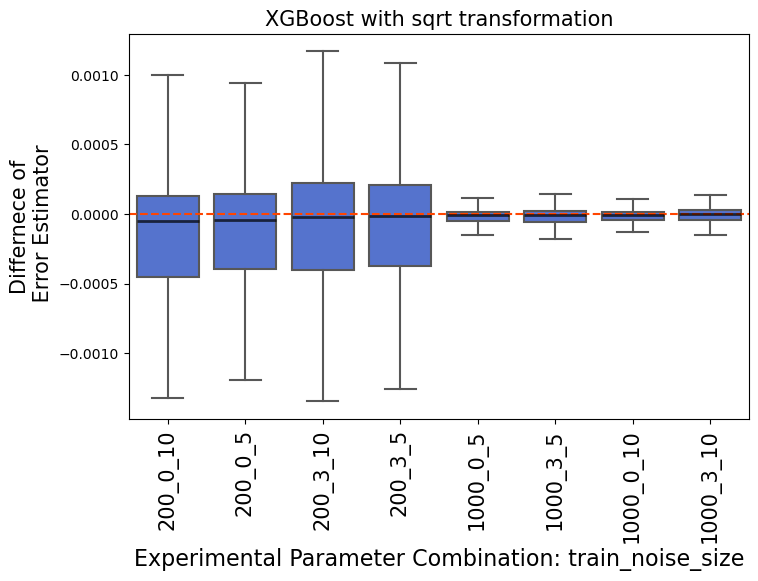

log
XGB
param_model
200_0_5     -0.000044
200_0_10    -0.000037
1000_0_5     -0.00001
1000_0_10   -0.000007
200_3_10    -0.000004
200_3_5     -0.000003
1000_3_10   -0.000001
1000_3_5    -0.000001
Name: difference, dtype: object


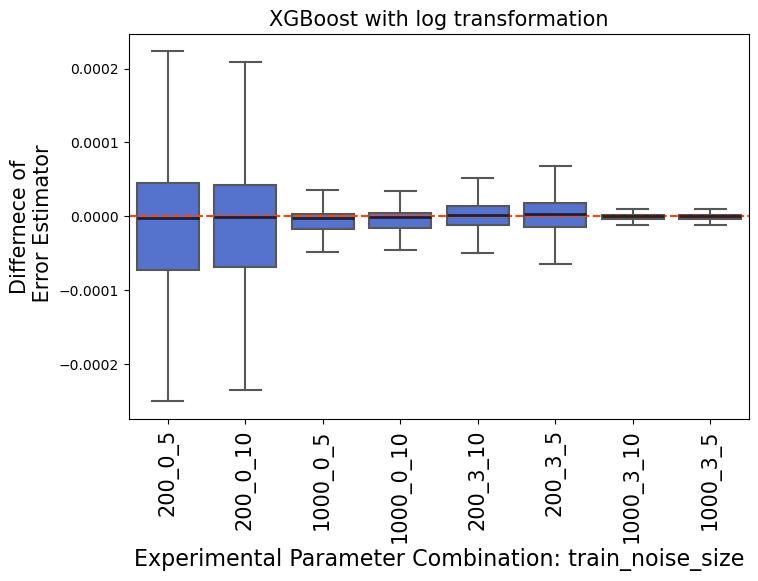

In [11]:
# filter data_exploded by model_info_model = 'RF' and model_info_transformation identity
transformations = ['identity', 'sqrt', 'log']
models = ['RF', 'XGB']
for model in models:
    for transformation in transformations:
        print(transformation)
        print(model)
        data_exploded_filtered = data_exploded[(data_exploded['model_info_model'] == model) & (data_exploded['model_info_transformation'] == transformation)]

        # select columns param_model, difference
        data_exploded_filtered = data_exploded_filtered[['param_model', 'difference']]

        # order by median
        medians = data_exploded_filtered.groupby('param_model')['difference'].mean() # ordered by mean
        sorted_categories = medians.sort_values().index
        print( medians.sort_values())

        # y range
        y_max = data_exploded_filtered['difference'].max()
        y_min = data_exploded_filtered['difference'].min()

        # boxplot
        plt.figure(figsize=(8, 5))
        sns.boxplot(x='param_model', y='difference', data=data_exploded_filtered,  showfliers=False, 
                    order=sorted_categories, color='royalblue', medianprops=dict(color="black", alpha=0.7, linewidth=2)) #whis=0
        plt.xticks(rotation=90, fontsize=15)


        #Line
        plt.axhline(y=0, color='orangered', linestyle='--')
        ''' 
        # Adding annotations
        plt.text(x=len(sorted_categories) - 0.5, y= y_max * 0.0095 , s='unstratified better', ha='right', va='bottom', color='orangered', fontsize=12)
        plt.text(x=len(sorted_categories) - 0.5, y= -y_max * 0.0095, s='stratified better', ha='right', va='top', color='orangered', fontsize=12)

        # Adding arrows
        arrow_length = y_max * 0.003 # Adjust this value for the desired arrow length
        plt.annotate('', xy=(len(sorted_categories) - 0.5, y_max * 0.0095), xytext=(len(sorted_categories) - 0.5, arrow_length),
                    arrowprops=dict(facecolor='orangered', shrink=0.05))
        plt.annotate('', xy=(len(sorted_categories) - 0.5, -y_max * 0.0095), xytext=(len(sorted_categories) - 0.5, -arrow_length),
                    arrowprops=dict(facecolor='orangered', shrink=0.05))
        '''
        plt.ylabel('Differnece of\n Error Estimator', fontsize=15)
        if model == 'RF':
            plt.title('Random Forest with ' + transformation + ' transformation', fontsize=15)
        else:
            plt.title('XGBoost with ' + transformation + ' transformation', fontsize=15)
        plt.xlabel('Experimental Parameter Combination: '+  '_'.join(model_vars_title),  fontsize=16)
        plt.savefig('./SLDS/Paper/Error Estimator/final/'+ model +'_ErrorEstimator_' + transformation + '.png', bbox_inches='tight')
        plt.show()




In [12]:
'''
# paired t-test of means
import itertools

from scipy.stats import ttest_1samp, ttest_rel
for param_model in data_exploded['param_model'].unique():
    print(param_model)
    data_exploded_filtered_param = data_exploded[data_exploded['param_model'] == param_model]
    flattened_list_startifed = list(itertools.chain(*data_exploded['error_estimator_stratified']))
    flattened_list_unstratified = list(itertools.chain(*data_exploded['error_estimator_unstratified']))
    print('Number of observations', len(flattened_list_startifed))
    #print(ttest_1samp(data_exploded_filtered_param['difference'].tolist(), 0))
    print(ttest_rel(flattened_list_startifed, flattened_list_unstratified, axis=0, nan_policy='propagate', alternative='two-sided'))
    # H1 angenommen: Dies bedeutet, dass die durchschnittlichen Ergebnisse vor und nach dem Test nicht gleich sind
'''

"\n# paired t-test of means\nimport itertools\n\nfrom scipy.stats import ttest_1samp, ttest_rel\nfor param_model in data_exploded['param_model'].unique():\n    print(param_model)\n    data_exploded_filtered_param = data_exploded[data_exploded['param_model'] == param_model]\n    flattened_list_startifed = list(itertools.chain(*data_exploded['error_estimator_stratified']))\n    flattened_list_unstratified = list(itertools.chain(*data_exploded['error_estimator_unstratified']))\n    print('Number of observations', len(flattened_list_startifed))\n    #print(ttest_1samp(data_exploded_filtered_param['difference'].tolist(), 0))\n    print(ttest_rel(flattened_list_startifed, flattened_list_unstratified, axis=0, nan_policy='propagate', alternative='two-sided'))\n    # H1 angenommen: Dies bedeutet, dass die durchschnittlichen Ergebnisse vor und nach dem Test nicht gleich sind\n"

# Difference MSE Final Performance

(9600,)
identity
RF
param_model
200_3_10    -0.000152
1000_0_10   -0.000097
1000_3_5    -0.000053
200_0_5      0.000027
1000_0_5     0.000035
200_0_10     0.000124
1000_3_10    0.000166
200_3_5      0.000402
Name: difference_performance_MSE, dtype: float64


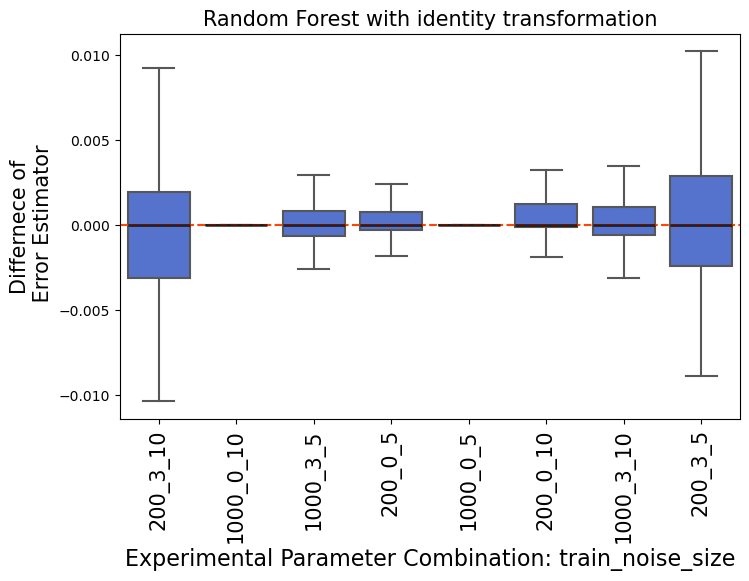

sqrt
RF
param_model
200_3_10    -0.001132
200_0_10    -0.000210
1000_0_5    -0.000054
1000_0_10   -0.000040
200_0_5     -0.000035
1000_3_5    -0.000006
1000_3_10    0.000037
200_3_5      0.000475
Name: difference_performance_MSE, dtype: float64


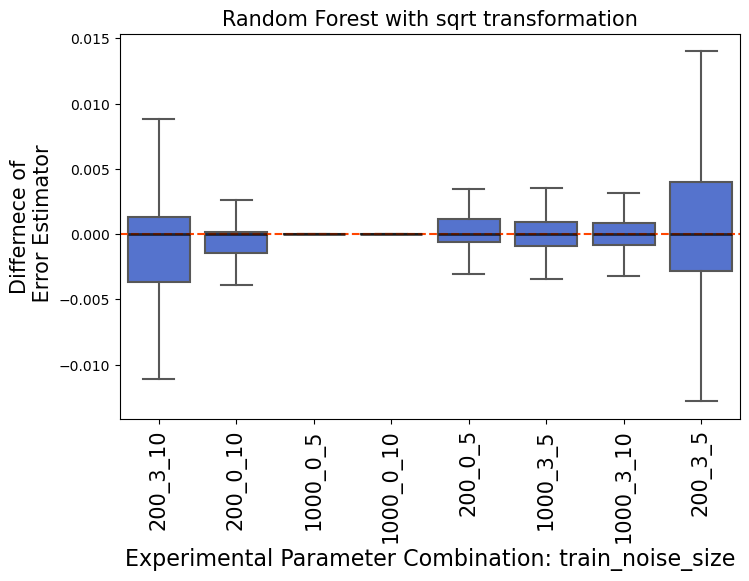

log
RF
param_model
200_0_5     -0.000271
1000_3_5    -0.000192
1000_3_10   -0.000101
1000_0_10   -0.000041
1000_0_5     0.000003
200_3_10     0.000061
200_0_10     0.000339
200_3_5      0.001070
Name: difference_performance_MSE, dtype: float64


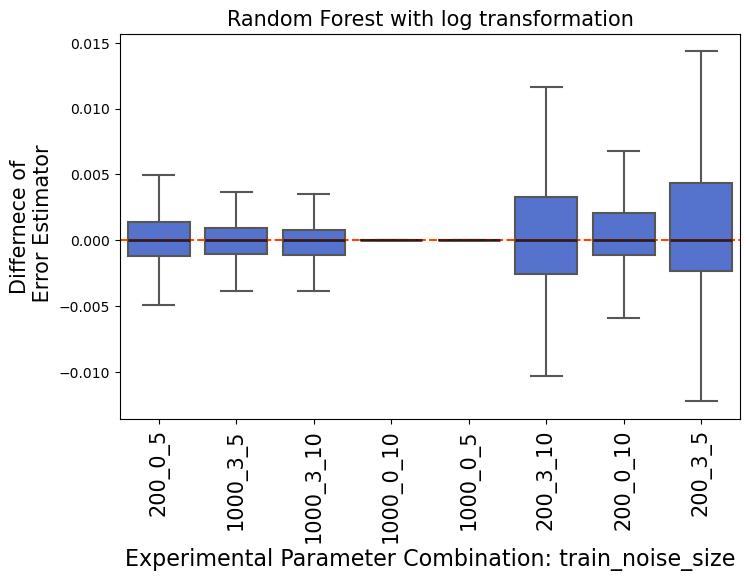

identity
XGB
param_model
1000_3_5    -0.001163
1000_3_10   -0.000594
1000_0_5    -0.000425
200_3_5     -0.000136
200_0_5      0.000037
200_0_10     0.000121
1000_0_10    0.000331
200_3_10     0.001575
Name: difference_performance_MSE, dtype: float64


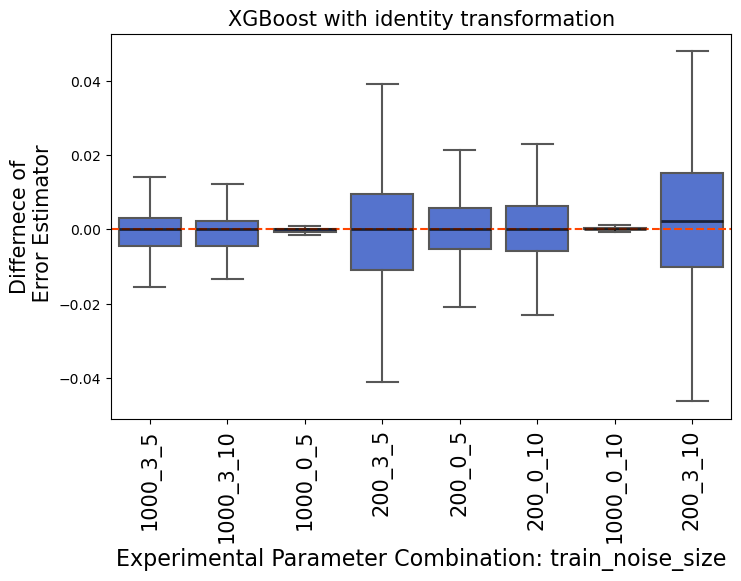

sqrt
XGB
param_model
1000_3_5    -0.000470
1000_3_10   -0.000367
1000_0_5     0.000122
200_0_5      0.000156
1000_0_10    0.000610
200_3_10     0.001093
200_0_10     0.001212
200_3_5      0.003137
Name: difference_performance_MSE, dtype: float64


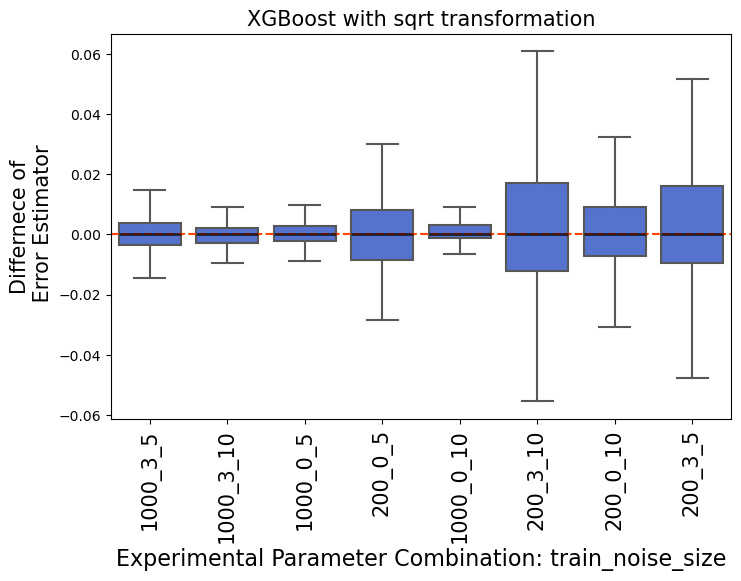

log
XGB
param_model
200_0_5     -0.000670
1000_3_5    -0.000578
1000_0_5    -0.000470
1000_3_10    0.000194
200_3_10     0.000437
1000_0_10    0.000558
200_0_10     0.000837
200_3_5      0.000887
Name: difference_performance_MSE, dtype: float64


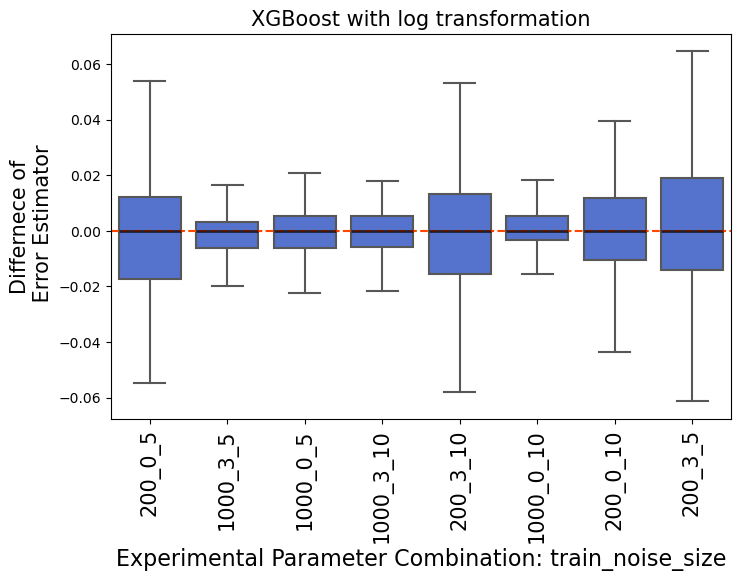

In [21]:
# filter data_exploded by model_info_model = 'RF' and model_info_transformation identity
transformations = ['identity', 'sqrt', 'log']
models = ['RF', 'XGB']
# Calculate the difference
metric = 'r2'
data['difference_performance_MSE'] = data['stratified_results_test ' + metric] - data['unstratified_results_test ' + metric]

print(data['difference_performance_MSE'].shape)

# Create plots
for model in models:
    for transformation in transformations:
        print(transformation)
        print(model)
        data_exploded_filtered = data[(data['model_info_model'] == model) & (data['model_info_transformation'] == transformation)]

        # select columns param_model, difference
        data_exploded_filtered = data_exploded_filtered[['param_model', 'difference_performance_MSE']]

        # order by median
        medians = data_exploded_filtered.groupby('param_model')['difference_performance_MSE'].mean() # ordered by mean
        sorted_categories = medians.sort_values().index
        print( medians.sort_values())

        # y range
        y_max = data_exploded_filtered['difference_performance_MSE'].max()
        y_min = data_exploded_filtered['difference_performance_MSE'].min()

        # boxplot
        plt.figure(figsize=(8, 5))
        sns.boxplot(x='param_model', y='difference_performance_MSE', data=data_exploded_filtered,  showfliers=False, 
                    order=sorted_categories, color='royalblue', medianprops=dict(color="black", alpha=0.7, linewidth=2)) #whis=0
        plt.xticks(rotation=90, fontsize=15)


        #Line
        plt.axhline(y=0, color='orangered', linestyle='--')
        ''' 
        # Adding annotations
        plt.text(x=len(sorted_categories) - 0.5, y= y_max * 0.0095 , s='unstratified better', ha='right', va='bottom', color='orangered', fontsize=12)
        plt.text(x=len(sorted_categories) - 0.5, y= -y_max * 0.0095, s='stratified better', ha='right', va='top', color='orangered', fontsize=12)

        # Adding arrows
        arrow_length = y_max * 0.003 # Adjust this value for the desired arrow length
        plt.annotate('', xy=(len(sorted_categories) - 0.5, y_max * 0.0095), xytext=(len(sorted_categories) - 0.5, arrow_length),
                    arrowprops=dict(facecolor='orangered', shrink=0.05))
        plt.annotate('', xy=(len(sorted_categories) - 0.5, -y_max * 0.0095), xytext=(len(sorted_categories) - 0.5, -arrow_length),
                    arrowprops=dict(facecolor='orangered', shrink=0.05))
        '''
        plt.ylabel('Differnece of\n Error Estimator', fontsize=15)
        if model == 'RF':
            plt.title('Random Forest with ' + transformation + ' transformation', fontsize=15)
        else:
            plt.title('XGBoost with ' + transformation + ' transformation', fontsize=15)
        plt.xlabel('Experimental Parameter Combination: '+  '_'.join(model_vars_title),  fontsize=16)
        plt.savefig('./SLDS/Paper/Final Performance/'+ model + '_' + metric+'_FinalPerformanceDifference_' + transformation + '.png', bbox_inches='tight')
        plt.show()


